#**Solutions for Module 1**

<br><br><br> <hr>

In [1]:
!pip install qiskit qiskit[visualization] qiskit-aer

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 162.6/162.6 kB 4.1 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 8.0/8.0 MB 71.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 12.4/12.4 MB 96.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.2/2.2 MB 80.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 49.5/49.5 kB 3.2 MB/s eta 0:00:00
  Created wheel for pylatexenc: filename=pylatexenc-2.10-py3-none-any.whl size=136817 sha256=cf26fd8f96b60afd54b2716b6b5c5633ccaa10f8ed6c2338e32293926839c2a5
  Stored in directory: /root/.cache/pip/wheels/06/3e/78/fa1588c1ae991bbfd814af2bcac6cef7a178beee1939180d46
Successfully built pylatexenc


<hr><h3><b> Introduction to Qiskit </b></h3>

<h4> Question 1 </h4>

In [ ]:
from qiskit import QuantumRegister, ClassicalRegister, QuantumCircuit
from qiskit.circuit.library.standard_gates import XGate

# Create quantum and classical registers with 10 qubits
qreg = QuantumRegister(10)
creg = ClassicalRegister(10) #For this question we don't need to create classical register

# Create a new circuit
circuit = QuantumCircuit(qreg,creg)

# Apply H to all qubits
circuit.h(qreg)

# Create a controlled version of the NOT gate
C9X = XGate().control(9)

# Qubits 1-9 are the control and qubit 0 is the target
# In python, you can use + to concatanate to lists
circuit.append(C9X,list(range(1,10)) + [0])

# Apply H to all qubits
circuit.h(qreg)

circuit.draw()

<hr><h3><b> Quantum superposition, measurement, and state collapse </h3></b>


<h4> Question 1 </h4>

<ol type="a">
  <li>Experiment 1</li>
</ol>

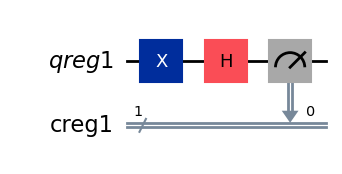

In [ ]:
# import all necessary objects and methods for quantum circuits
from qiskit import QuantumRegister, ClassicalRegister, QuantumCircuit
from qiskit_aer import AerSimulator

# define a quantum register with one qubit
q1 =  QuantumRegister(1,"qreg1")

# define a classical register with one bit
# it stores the measurement result of the quantum part
c1 = ClassicalRegister(1,"creg1")

# define our quantum circuit
qc1 = QuantumCircuit(q1,c1)

# apply x-gate to the first qubit
qc1.x(q1[0])

# apply h-gate (Hadamard: quantum coin-flipping) to the first qubit
qc1.h(q1[0])

# measure the first qubit, and store the result in the first classical bit
qc1.measure(q1,c1)

# draw the circuit by using matplotlib
qc1.draw(output='mpl') # re-run the cell if the figure is not displayed

In [ ]:
# execute the circuit 10000 times in the local simulator

job = AerSimulator().run(qc1,shots=10000)
counts1 = job.result().get_counts(qc1)
print(counts1) # print the outcomes

{'0': 5031, '1': 4969}


<ol type="a", start = "2">
  <li>Experiment 2</li>
</ol>

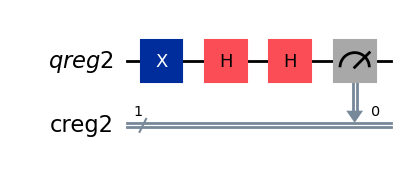

In [ ]:
# import all necessary objects and methods for quantum circuits
from qiskit import QuantumRegister, ClassicalRegister, QuantumCircuit
from qiskit_aer import AerSimulator

# define a quantum register with one qubit
q2 =  QuantumRegister(1,"qreg2")

# define a classical register with one bit
# it stores the measurement result of the quantum part
c2 = ClassicalRegister(1,"creg2")

# define our quantum circuit
qc2 = QuantumCircuit(q2,c2)

# apply x-gate to the first qubit
qc2.x(q2[0])

# apply h-gate (Hadamard: quantum coin-flipping) to the first qubit
qc2.h(q2[0])

# apply h-gate (Hadamard: quantum coin-flipping) to the first qubit once more
qc2.h(q2[0])

# measure the first qubit, and store the result in the first classical bit
qc2.measure(q2,c2)

# draw the circuit by using matplotlib
qc2.draw(output='mpl')

In [ ]:
# execute the circuit 10000 times in the local simulator

job = AerSimulator().run(qc2,shots=10000)
counts2 = job.result().get_counts(qc2)
print(counts2) # print the outcomes

{'1': 10000}


<hr><h3><b> Bloch‑sphere visualization of a qubit </h3></b>

<h4> Question 1 </h4>

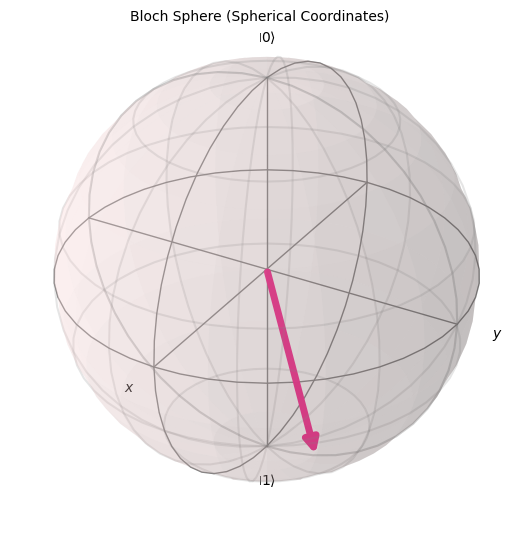

In [ ]:
import numpy as np
from qiskit.visualization import plot_bloch_vector

# Given qubit: |ψ⟩ = cos(π/3)|0⟩ + e^{iπ/4} sin(π/3)|1⟩
theta = 2 * np.pi / 3
phi = np.pi / 4

# Cartesian coordinates
x = np.sin(theta) * np.cos(phi)
y = np.sin(theta) * np.sin(phi)
z = np.cos(theta)

# Plot using Cartesian coordinates
plot_bloch_vector([x, y, z], title="Bloch Sphere (Cartesian Coordinates)")

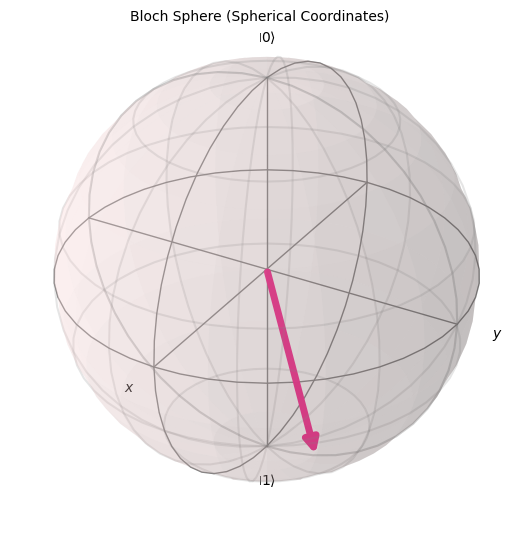

In [ ]:
# Given qubit: |ψ⟩ = cos(π/3)|0⟩ + e^{iπ/4} sin(π/3)|1⟩
theta = 2 * np.pi / 3
phi = np.pi / 4

# Plot using spherical coordinates
plot_bloch_vector([1, theta, phi], coord_type='spherical', title="Bloch Sphere (Spherical Coordinates)")

<hr>

<h3><b> Single-qubit gates as rotations on Bloch sphere </b></h3>

<h4> Question 1 </h4>

Check whether $U(π, 0, \frac{π}{2})$ acting on $|0⟩$ produces the same result as the Pauli-Y gate. In Qiskit, the Pauli-Y gate can be applied using <code>qc.y(qubit)</code>.

(Hint: Compare the final statevectors and plot the Bloch sphere.)


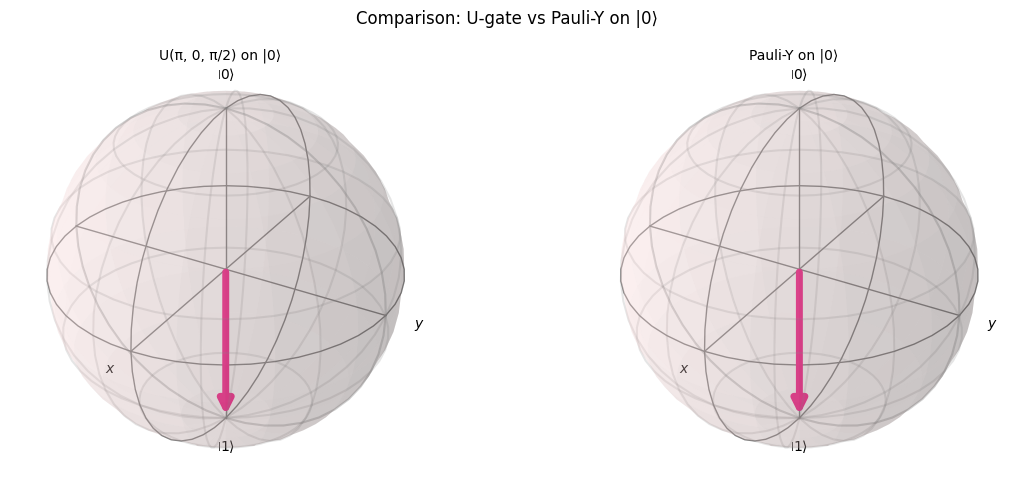

In [2]:
from qiskit import QuantumCircuit
from qiskit.quantum_info import Statevector
from qiskit.visualization import plot_bloch_vector
import numpy as np
import matplotlib.pyplot as plt

# Helper function to convert statevector to Bloch vector
def bloch_coords(state):
    """
    Converts a single-qubit statevector to Bloch sphere coordinates [x, y, z].
    """
    a, b = state.data
    x = 2 * np.real(np.conj(a) * b)
    y = 2 * np.imag(np.conj(a) * b)
    z = np.abs(a)**2 - np.abs(b)**2
    return [x, y, z]

# Create circuits and obtain statevectors

# Circuit 1: Apply U-gate on |0>
qc_u = QuantumCircuit(1)
qc_u.u(np.pi, 0, np.pi/2, 0)  # Apply U(pi, 0, pi/2) on |0>
state_u = Statevector.from_instruction(qc_u)

# Circuit 2: Apply Pauli-Y gate on |0>
qc_y = QuantumCircuit(1)
qc_y.y(0)  # Apply Pauli-Y gate on |0>
state_y = Statevector.from_instruction(qc_y)

# Plot Bloch spheres side by side
fig, axes = plt.subplots(1, 2, figsize=(12,5), subplot_kw={'projection':'3d'})

plot_bloch_vector(bloch_coords(state_u), title="U(π, 0, π/2) on |0⟩", ax=axes[0])
plot_bloch_vector(bloch_coords(state_y), title="Pauli-Y on |0⟩", ax=axes[1])

plt.suptitle("Comparison: U-gate vs Pauli-Y on |0⟩")
plt.tight_layout()
plt.show()

<h4> Conclusion:</h4>

Both $U(\pi, 0, \frac{π}{2})$ and the Pauli-Y gate rotate $|0⟩$ to $|1⟩$ along the $y$-axis.
The final statevectors are identical up to a global phase,
so the Bloch sphere plots look the same.</p>

<hr>

<h4>Question 2</h4>

<p>Check whether applying $P\left(\frac{\pi}{2}\right)$ to the state $|+\rangle$ produces the same result as
applying $U(0, 0, \frac{\pi}{2})$ to the same state.</p>

<p>Do both gates cause the same type of rotation on the Bloch sphere, and do they affect measurement probabilities or only the relative phase?</p>

(Hint: Think about which component of the qubit state each gate rotates and how that would
affect the qubit’s position on the Bloch sphere.)


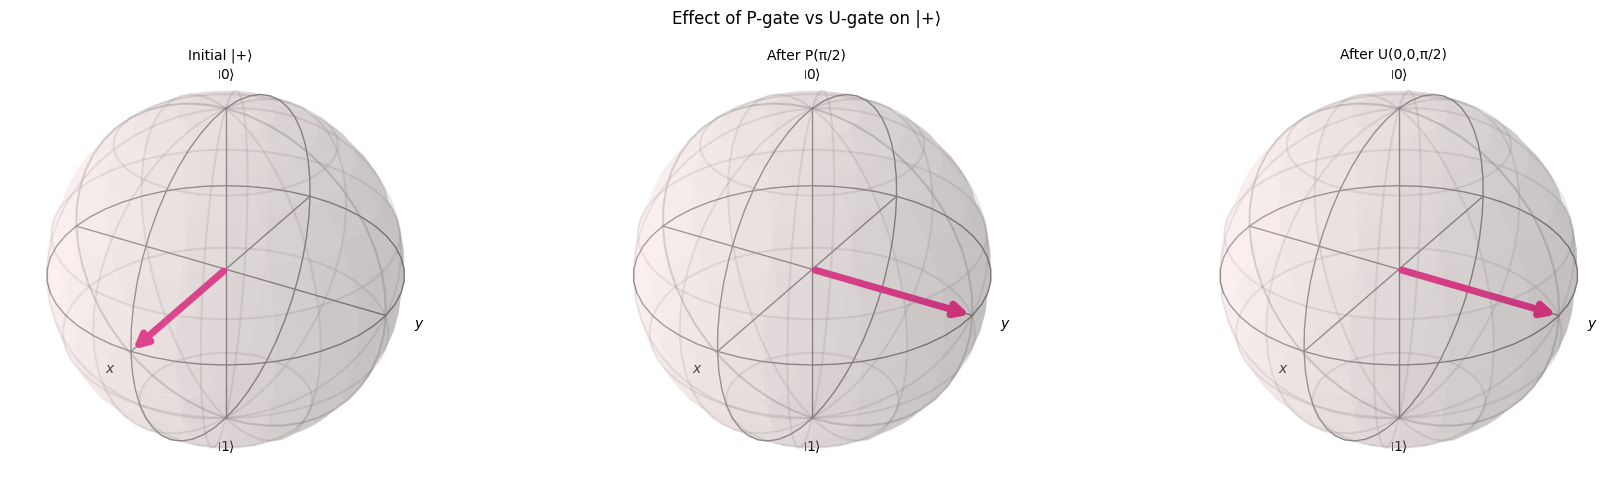

In [3]:
from qiskit import QuantumCircuit
from qiskit.quantum_info import Statevector
from qiskit.visualization import plot_bloch_vector
import numpy as np
import matplotlib.pyplot as plt

# Helper function to convert statevector to Bloch vector
def bloch_coords(state):
    a, b = state.data
    x = 2 * np.real(np.conj(a) * b)
    y = 2 * np.imag(np.conj(a) * b)
    z = np.abs(a)**2 - np.abs(b)**2
    return [x, y, z]

# Prepare the |+> state using H gate
qc_plus = QuantumCircuit(1)
qc_plus.h(0)  # Apply H gate
state_plus = Statevector.from_instruction(qc_plus)

# Apply P(pi/2) to |+>
qc_p = qc_plus.copy()
qc_p.p(np.pi/2, 0) # Apply P gate at pi/2
state_p = Statevector.from_instruction(qc_p)

# Apply U(0,0,pi/2) to |+>
qc_u = qc_plus.copy()
qc_u.u(0, 0, np.pi/2, 0) # Apply U gate
state_u = Statevector.from_instruction(qc_u)

# Plot all three Bloch spheres side by side (1: Initial, 2: After P gate, 3: After U gate)
fig, axes = plt.subplots(1, 3, figsize=(18,5), subplot_kw={'projection':'3d'})

plot_bloch_vector(bloch_coords(state_plus), title="Initial |+⟩", ax=axes[0])
plot_bloch_vector(bloch_coords(state_p), title="After P(π/2)", ax=axes[1])
plot_bloch_vector(bloch_coords(state_u), title="After U(0,0,π/2)", ax=axes[2])

plt.suptitle("Effect of P-gate vs U-gate on |+⟩")
plt.tight_layout()
plt.show()


<h4> Conclusion: </h4>
<p> Both $P(\frac{π}{2})$ and $U(0,0,\frac{π}{2})$ rotate $|+\rangle$ around the $z$-axis to point along +$y$,
changing the phase only.
<hr>

<h4>Question 3 </h4>
<p>
Take the state $|0\rangle$. Apply $R_x(\theta)$, $R_y(\theta)$, and $R_z(\phi)$ rotations.
Which rotations leave the state unchanged?
Check using the Bloch sphere and statevector.
</p>

(Hint:
States along the rotation axis stay the same; others rotate in the perpendicular plane.)



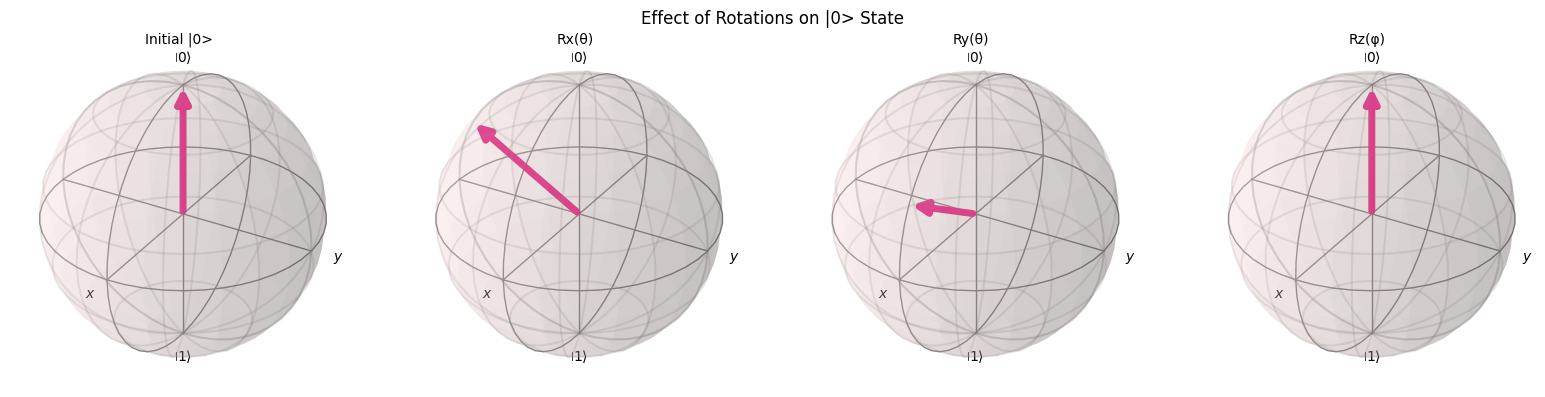

In [4]:
from qiskit import QuantumCircuit
from qiskit.quantum_info import Statevector
from qiskit.visualization import plot_bloch_vector
import matplotlib.pyplot as plt
import numpy as np

# Convert statevector to Bloch vector
def bloch_coords(state):
    a, b = state.data
    x = 2 * np.real(np.conj(a) * b)
    y = 2 * np.imag(np.conj(a) * b)
    z = np.abs(a)**2 - np.abs(b)**2
    return [x, y, z]

# Initial state |0>
qc_init = QuantumCircuit(1)
state_init = Statevector.from_instruction(qc_init)

# Rotation angles
theta = np.pi/3
phi = np.pi/3

# Rotations as functions-
rotations = {
    "Rx(θ)": lambda qc: qc.rx(theta, 0),
    "Ry(θ)": lambda qc: qc.ry(theta, 0),
    "Rz(φ)": lambda qc: qc.rz(phi, 0)
}

# Plot Bloch spheres side by side
fig, axes = plt.subplots(1, 4, figsize=(16,4), subplot_kw={'projection':'3d'})

# Initial state
plot_bloch_vector(bloch_coords(state_init), title="Initial |0>", ax=axes[0])

# Apply rotations and plot for each gate
for i, (name, rot_func) in enumerate(rotations.items()):
    qc_rot = qc_init.copy()
    rot_func(qc_rot)
    state_rot = Statevector.from_instruction(qc_rot)
    plot_bloch_vector(bloch_coords(state_rot), title=name, ax=axes[i+1])

plt.suptitle("Effect of Rotations on |0> State")
plt.tight_layout()
plt.show()


<h4>Conclusion:</h4>
<p>
For the state $|0\rangle$, $R_x(\theta)$ and $R_y(\theta)$ rotate the state in the $yz$ and $xz$ planes, changing its direction. However, $R_z(\phi)$ leaves $|0\rangle$ unchanged on the Bloch sphere, as it only adds a phase without affecting measurement probabilities.

This can be verified visually using the Bloch sphere and numerically via the statevector.
</p>
<hr>

<h4>Question 4</h4>

Starting from the state $|0⟩$ or the superposition state $|+⟩$, apply one or more of the gates $X$, $Y$, and $Z$.  
Which new states can you obtain? Check your results by examining the statevector and plotting the Bloch sphere.

(Hint: Remember that $X$ flips the qubit (bit-flip), $Y$ flips both bit and phase, $Z$ flips only the phase.)

Use the Bloch sphere to visualize rotations and see which states are equivalent after applying different gates.


<h4>Conceptual Answer:</h4>

Starting from $|0⟩$:
- <b>$X$:</b> flips $|0⟩$ →$|1⟩$ (bit-flip, 180° around $x$-axis)<br>
- <b>$Y$:</b> flips $|0⟩$ → $i|1⟩$ (bit and phase flip, 180° around $y$-axis)<br>
- <b>$Z$:</b> leaves |0⟩ unchanged (phase flip, 180° around $z$-axis)<br><br>

Starting from $|+⟩$ = $(\frac{|0⟩+|1⟩}{√2})$:</b><br>
- <b>$X$:</b> $|+⟩$ → $|+⟩$ ($X$ flips amplitudes, but $|+⟩$ is symmetric)<br>
- <b>$Y$:</b> $|+⟩$ → $\frac{i(|1⟩-|0⟩}{√2} $(rotates 180° around $y$-axis)<br>
- <b>$Z$:</b> $|+⟩$ → $|−⟩$ = $\frac{|0⟩-|1⟩}{√2}$(phase flip, rotation around $z$-axis)<br><br>

<b>Gate combinations:</b> Applying multiple gates rotates the qubit along different axes, producing new states that can be visualized on the Bloch sphere.



Initial state: |0>
Statevector (initial): [1.+0.j 0.+0.j]
Statevector (X): [0.+0.j 1.+0.j]
Statevector (Y): [0.+0.j 0.+1.j]
Statevector (Z): [1.+0.j 0.+0.j]
Statevector (X->Y): [0.-1.j 0.+0.j]
Statevector (X->Z): [ 0.+0.j -1.+0.j]
Statevector (Y->Z): [0.+0.j 0.-1.j]


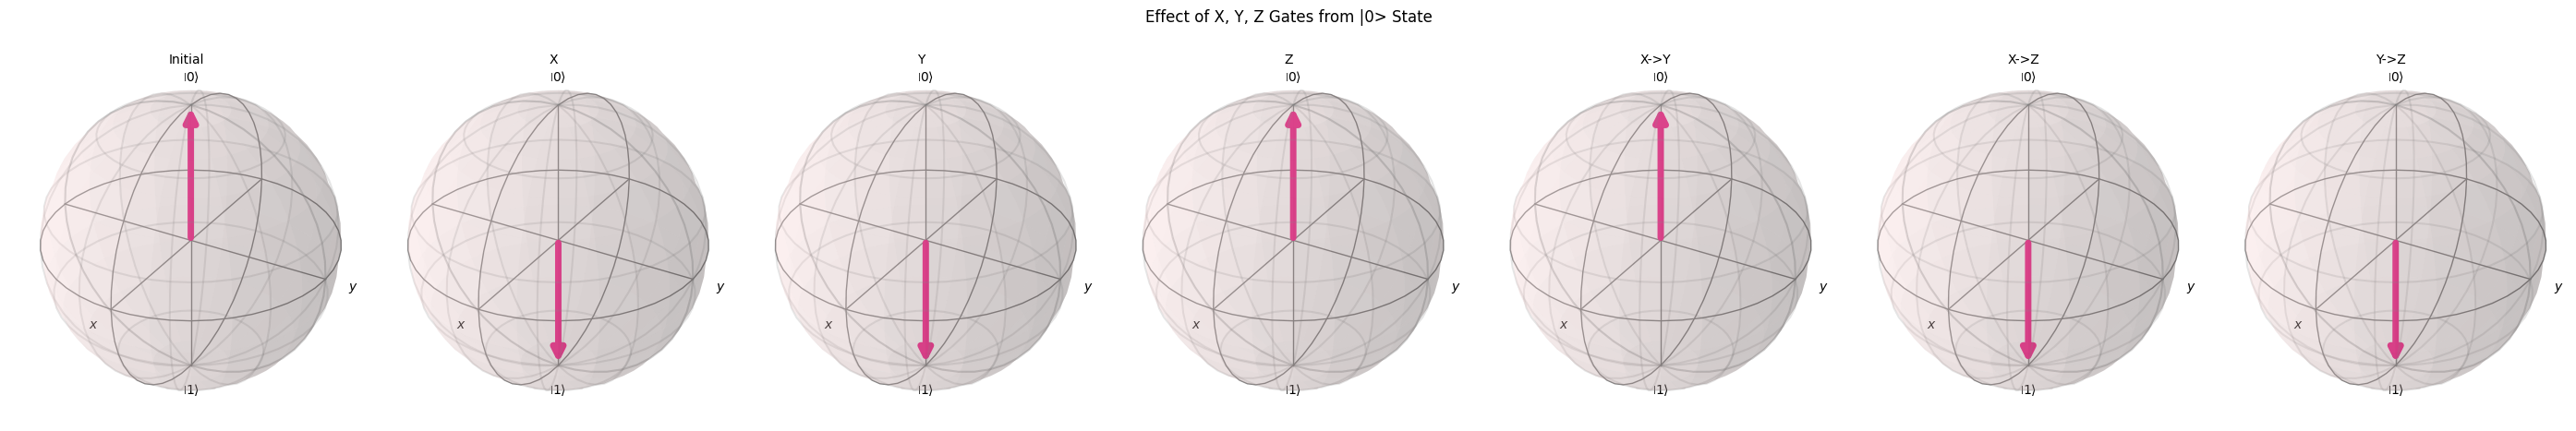


Initial state: |+>
Statevector (initial): [0.70710678+0.j 0.70710678+0.j]
Statevector (X): [0.70710678+0.j 0.70710678+0.j]
Statevector (Y): [0.-0.70710678j 0.+0.70710678j]
Statevector (Z): [ 0.70710678+0.j -0.70710678+0.j]
Statevector (X->Y): [0.-0.70710678j 0.+0.70710678j]
Statevector (X->Z): [ 0.70710678+0.j -0.70710678+0.j]
Statevector (Y->Z): [0.-0.70710678j 0.-0.70710678j]


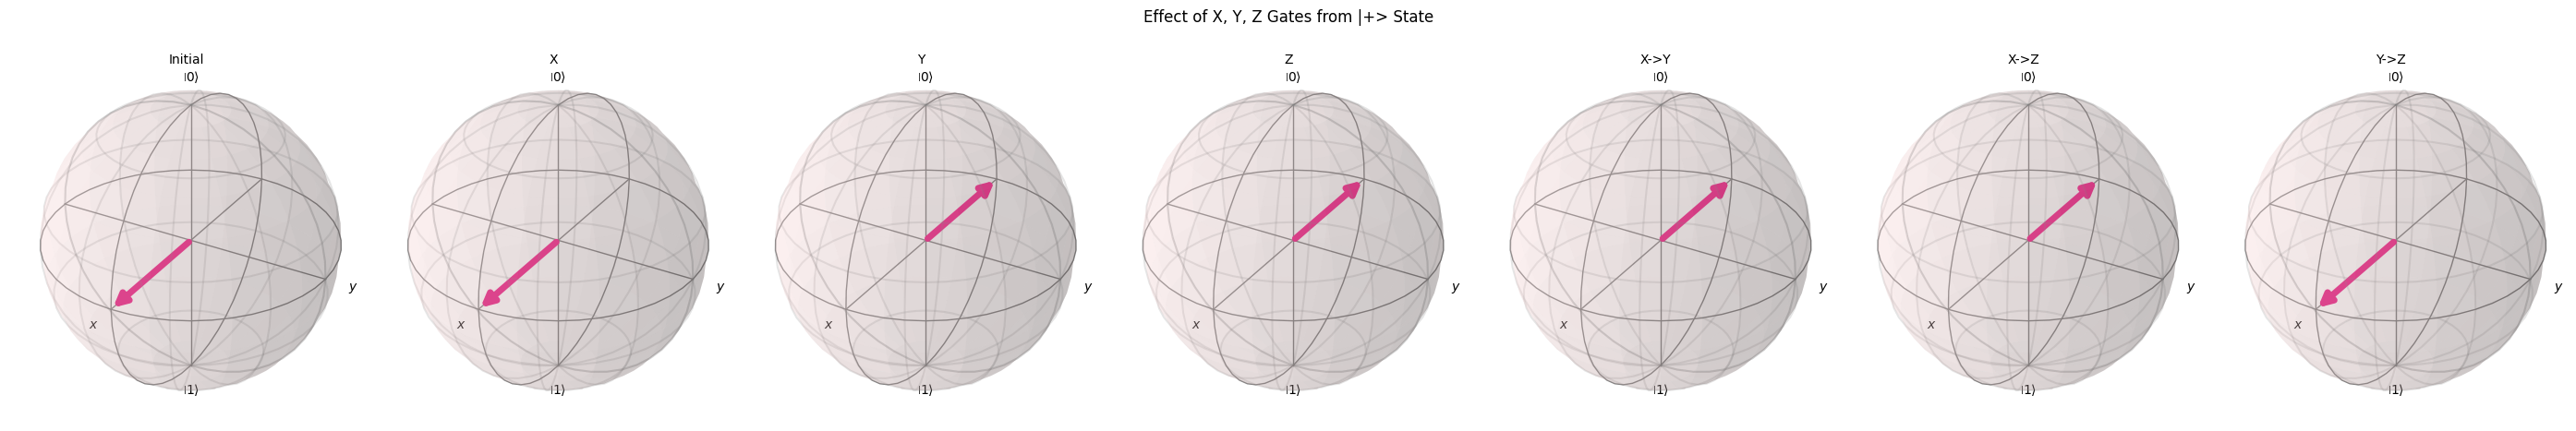

In [5]:
from qiskit import QuantumCircuit
from qiskit.quantum_info import Statevector
from qiskit.visualization import plot_bloch_vector
import matplotlib.pyplot as plt
import numpy as np

# Function to convert statevector to Bloch vector
def bloch_coords(state):
    a, b = state.data
    x = 2 * np.real(np.conj(a) * b)
    y = 2 * np.imag(np.conj(a) * b)
    z = np.abs(a)**2 - np.abs(b)**2
    return [x, y, z]

# Prepare initial states |0> and |+>
initial_states = {
    "|0>": QuantumCircuit(1),
    "|+>": QuantumCircuit(1)
}
initial_states["|+>"].h(0)  # Apply H gate to obtain superposition state

# Define gate sequences to apply
gate_sequences = {
    "X": ["x"],
    "Y": ["y"],
    "Z": ["z"],
    "X->Y": ["x","y"],
    "X->Z": ["x","z"],
    "Y->Z": ["y","z"]
}


# Apply gates and plot results
for state_name, qc_init in initial_states.items():
    print(f"\nInitial state: {state_name}")
    fig, axes = plt.subplots(1, len(gate_sequences)+1, figsize=(4*(len(gate_sequences)+1),5), subplot_kw={'projection':'3d'})

    # Plot initial state
    state_before = Statevector.from_instruction(qc_init)
    plot_bloch_vector(bloch_coords(state_before), title="Initial", ax=axes[0])
    print("Statevector (initial):", state_before.data)

    # Apply each gate sequence
    for idx, (seq_name, gates) in enumerate(gate_sequences.items(), start=1):
        qc = qc_init.copy()
        for g in gates:
            getattr(qc, g)(0)
        state_after = Statevector.from_instruction(qc)
        plot_bloch_vector(bloch_coords(state_after), title=seq_name, ax=axes[idx])
        print(f"Statevector ({seq_name}):", state_after.data)

    plt.suptitle(f"Effect of X, Y, Z Gates from {state_name} State")
    plt.tight_layout()
    plt.show()


<h4>Conclusion:</h4>

Applying $X$, $Y$, and $Z$ gates (alone or in combination) rotates the qubit along different axes of the Bloch sphere.  
From $|0⟩$ or $|+⟩$, these gates produce distinct states with specific amplitude and phase changes, which can be verified by the statevector and visualized clearly on the Bloch sphere.
<hr>

<h5>Question 5</h5>

Apply a Hadamard gate to a qubit. Can you reproduce the same final state by first applying an $R_y(\frac{π}{2})$ rotation followed by an $X$ gate?  
Try it with different initial states and compare the results using the Bloch sphere and statevectors.



Initial state: |0>
Statevector after H: [0.70710678+0.j 0.70710678+0.j]
Statevector after RY(pi/2) + X: [0.70710678+0.j 0.70710678+0.j]


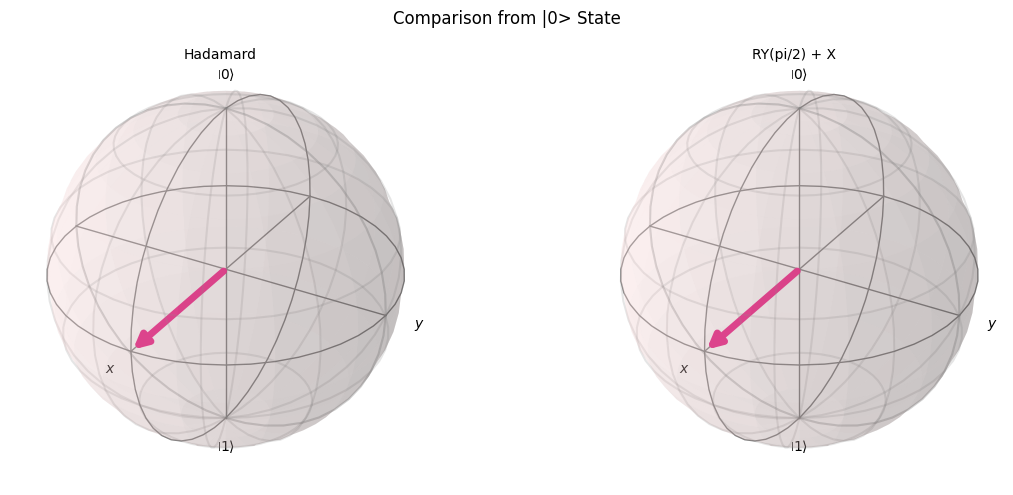


Initial state: |1>
Statevector after H: [ 0.70710678+0.j -0.70710678+0.j]
Statevector after RY(pi/2) + X: [ 0.70710678+0.j -0.70710678+0.j]


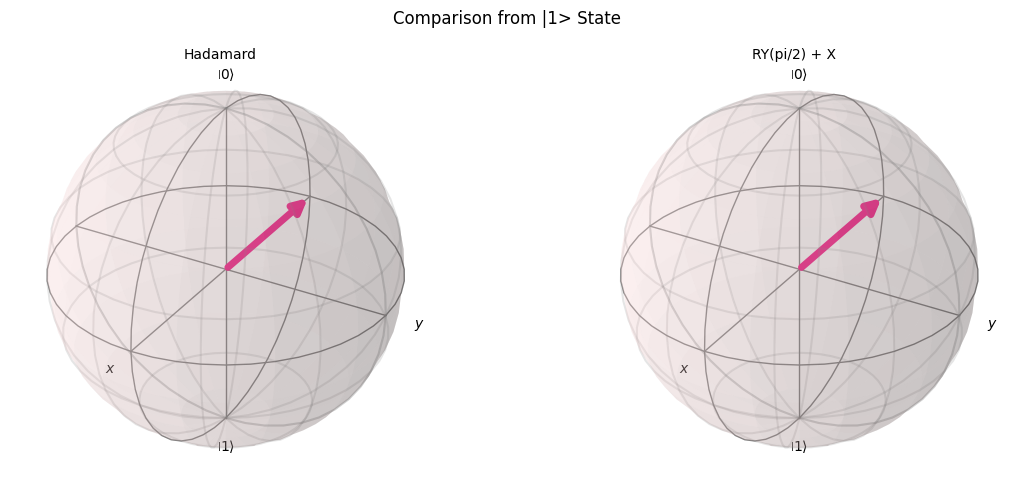

In [6]:
from qiskit import QuantumCircuit
from qiskit.quantum_info import Statevector
from qiskit.visualization import plot_bloch_vector
import matplotlib.pyplot as plt
import numpy as np

# Function to convert statevector to Bloch vector
def bloch_coords(state):
    a, b = state.data
    x = 2 * np.real(np.conj(a) * b)
    y = 2 * np.imag(np.conj(a) * b)
    z = np.abs(a)**2 - np.abs(b)**2
    return [x, y, z]

# Prepare initial states |0> and |1>
initial_states = {
    "|0>": QuantumCircuit(1),
    "|1>": QuantumCircuit(1)
}
initial_states["|1>"].x(0)  # Prepare |1> state

# Apply gates and compare the output
for state_name, qc_init in initial_states.items():
    print(f"\nInitial state: {state_name}")

    # Apply Hadamard gate
    qc_h = qc_init.copy()
    qc_h.h(0)
    state_h = Statevector.from_instruction(qc_h)

    # Apply Ry(pi/2) then X
    qc_ryx = qc_init.copy()
    qc_ryx.ry(np.pi/2, 0)
    qc_ryx.x(0)
    state_ryx = Statevector.from_instruction(qc_ryx)

    # Print statevectors
    print("Statevector after H:", state_h.data)
    print("Statevector after RY(pi/2) + X:", state_ryx.data)

    # Plot Bloch spheres side by side
    fig, axes = plt.subplots(1, 2, figsize=(12,5), subplot_kw={'projection':'3d'})
    plot_bloch_vector(bloch_coords(state_h), title="Hadamard", ax=axes[0])
    plot_bloch_vector(bloch_coords(state_ryx), title="RY(pi/2) + X", ax=axes[1])
    plt.suptitle(f"Comparison from {state_name} State")
    plt.tight_layout()
    plt.show()


<h4>Conclusion:</h4>

Applying a Hadamard gate to a qubit in $|0⟩$ or $|1⟩$ creates a superposition state on the equator of the Bloch sphere.  
By applying $R_y(\frac{π}{2})$ followed by $X$, we can reproduce a statevector that is very close to the Hadamard result, but the relative phases may differ depending on the initial state.

The Bloch sphere shows that both sequences rotate the state to the equator, confirming that combinations of rotation gates and $X$ can reproduce Hadamard-like effects.
<hr>

<h4> Question 6 </h4></b>

Starting from the state $|+\rangle$, use only $S$ and $T$ gates to rotate the statevector around the Bloch sphere. Can you reach the state
$|-i\rangle$ =$ \frac{|0\rangle - i|1\rangle}{\sqrt{2}}$?

(Hint: The $S$ gate rotates ±90° around the $z$-axis, the $T$ gate rotates ±45° around the $z$-axis. Phase gates alone move the state along the equator of the Bloch sphere.)




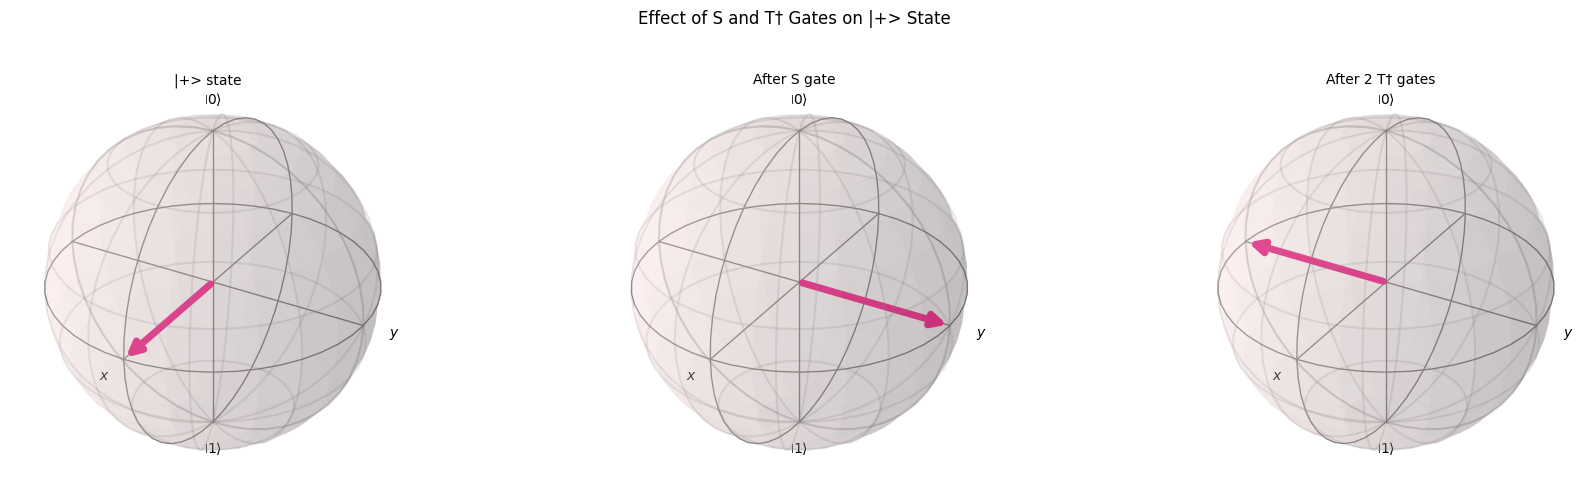

In [7]:
from qiskit import QuantumCircuit
from qiskit.quantum_info import Statevector
from qiskit.visualization import plot_bloch_vector
import matplotlib.pyplot as plt
import numpy as np

# Function to convert statevector to Bloch vector
def bloch_coords(state):
    a, b = state.data
    x = 2 * np.real(np.conj(a) * b)
    y = 2 * np.imag(np.conj(a) * b)
    z = np.abs(a)**2 - np.abs(b)**2
    return [x, y, z]

# Step 1: Prepare |+> state
qc_plus = QuantumCircuit(1)
qc_plus.h(0)  # |+> = H|0>
state_plus = Statevector.from_instruction(qc_plus)

# Step 2: Apply S gate
qc_s = qc_plus.copy()
qc_s.s(0)  # 90° rotation around z-axis
state_s = Statevector.from_instruction(qc_s)

# Step 3: Apply T† gate (T dagger) to reach |-i>
qc_td = qc_plus.copy()
qc_td.tdg(0)  # -45° rotation
qc_td.tdg(0)  # another -45° rotation to reach -90° total
state_td = Statevector.from_instruction(qc_td)

# Step 4: Plot Bloch spheres side by side
fig, axes = plt.subplots(1, 3, figsize=(18,5), subplot_kw={'projection':'3d'})

plot_bloch_vector(bloch_coords(state_plus), title="|+> state", ax=axes[0])
plot_bloch_vector(bloch_coords(state_s), title="After S gate", ax=axes[1])
plot_bloch_vector(bloch_coords(state_td), title="After 2 T† gates", ax=axes[2])

plt.suptitle("Effect of S and T† Gates on |+> State")
fig.tight_layout(rect=[0, 0, 1, 0.95])
plt.show()


<h4>Conclusion</h3>

Starting from the $|+⟩$ state, phase gates $S$ and $T^†$ rotate the statevector along the equator of the Bloch sphere.  
- The $S$ gate rotates by +90° around the $z$-axis.  
- Applying two $T^†$ gates rotates -45° each, giving a total -90° rotation.  

This shows that phase gates can reach any state on the equator by combining ±45° and ±90° rotations.
<hr>

<h4>Question 7: Designing a Qubit for a Quantum Protocol</h4>
<p>

You are tasked with preparing a qubit in a specific superposition state needed for a quantum algorithm. Starting from $|0\rangle$, apply a sequence of single-qubit gates:
$H \rightarrow R_y(\pi/4) \rightarrow T \rightarrow R_z(\pi/2) \rightarrow S \rightarrow X$
to reach a target state that is neither purely on the equator nor at the poles.  

Visualize how the statevector moves on the Bloch sphere and describe its **final orientation** in terms of polar and azimuthal angles.
</p>

Hint:
<ul>
<li>Use rotation gates $R_x, R_y, R_z$ to control latitude and longitude.</li>
<li>Phase gates $S, T$ rotate the qubit around the
$z$-axis without changing latitude.</li>
<li>The $H$ gate moves the qubit from the pole to the equator, setting up interference.</li>
<li>Pauli-$X$ flips the state along the $x$-axis. Combine all to reach the desired orientation.</li>
<li>Visualize each step on the Bloch sphere to understand the cumulative effect of rotations and phase adjustments.</li>
</ul>


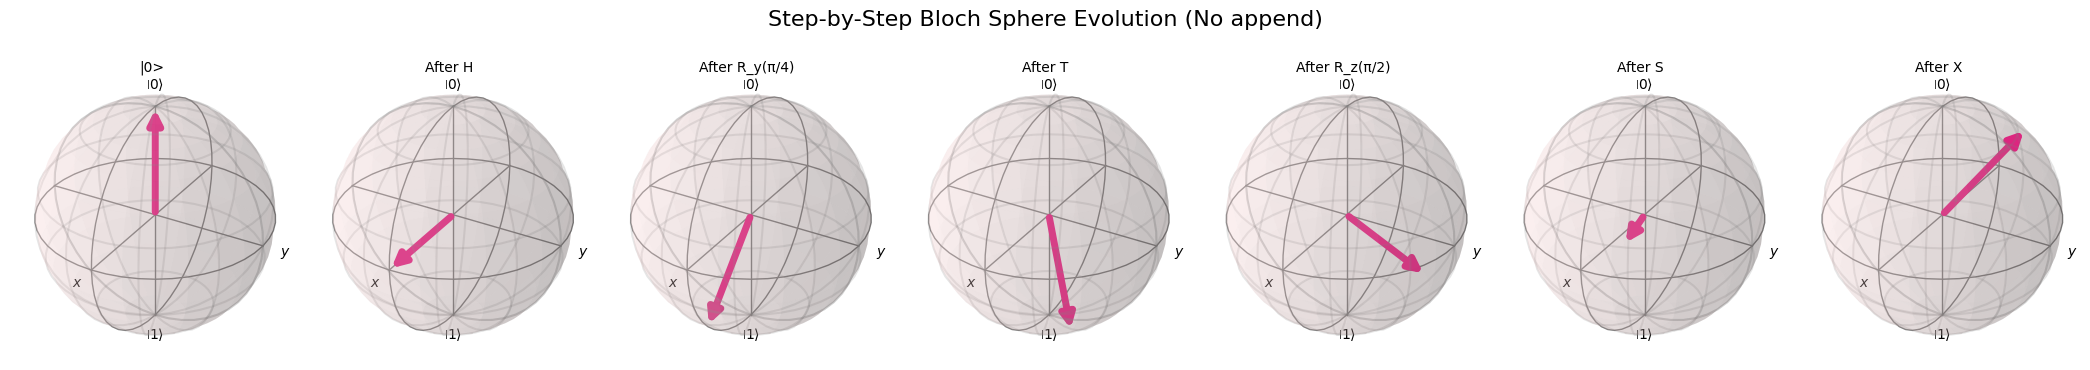

Final state amplitudes: [-0.92387953+5.55111512e-17j  0.27059805-2.70598050e-01j]


In [8]:
from qiskit import QuantumCircuit
from qiskit.quantum_info import Statevector
from qiskit.visualization import plot_bloch_vector
import matplotlib.pyplot as plt
import numpy as np

# Function to convert statevector to Bloch coordinates
def bloch_coords(state):
    a, b = state.data
    x = 2 * np.real(np.conj(a) * b)
    y = 2 * np.imag(np.conj(a) * b)
    z = np.abs(a)**2 - np.abs(b)**2
    return [x, y, z]

# Initialize circuit
qc = QuantumCircuit(1)

# Initial state |0>
state0 = Statevector.from_instruction(qc)

# Apply H
qc.h(0)
state1 = Statevector.from_instruction(qc)

# Apply R_y(pi/4)
qc.ry(np.pi/4, 0)
state2 = Statevector.from_instruction(qc)

# Apply T
qc.t(0)
state3 = Statevector.from_instruction(qc)

# Apply R_z(pi/2)
qc.rz(np.pi/2, 0)
state4 = Statevector.from_instruction(qc)

# Apply S
qc.s(0)
state5 = Statevector.from_instruction(qc)

# Apply X
qc.x(0)
state6 = Statevector.from_instruction(qc)

# Plot Bloch spheres side by side
fig, axes = plt.subplots(1, 7, figsize=(21, 4), subplot_kw={'projection':'3d'})
states = [state0, state1, state2, state3, state4, state5, state6]
titles = ["|0>", "After H", "After R_y(π/4)", "After T", "After R_z(π/2)", "After S", "After X"]

for ax, st, title in zip(axes, states, titles):
    plot_bloch_vector(bloch_coords(st), title=title, ax=ax)

plt.suptitle("Step-by-Step Bloch Sphere Evolution (No append)", fontsize=16)
plt.tight_layout()
plt.show()

# Print final state amplitudes
print("Final state amplitudes:", state6.data)


<h4>Conclusion:</h4>

Starting from $|0\rangle$, the sequence of gates moves the qubit along a path on the Bloch sphere, showing how single-qubit gates combine to engineer a desired state:  

- $H$ moves the qubit from the pole to the equator, creating an equal superposition.  
- $R_y(\frac{π}{4})$ rotates the state upward along the $y$-axis, controlling the latitude (how close it is to $|0\rangle$ or $|1\rangle$).  
- $T$ and $S$ rotate the state around the $z$-axis, adjusting the phase without changing latitude.  
- $R_z(\frac{π}{2})$ further changes the longitude, fine-tuning the qubit's position on the equator.  
- $X$ flips the state along the $x$-axis, combining with previous rotations to reach the final orientation.  

Together, these gates demonstrate that any desired single-qubit state can be reached by **combining rotations and phase shifts**, and visualizing the Bloch sphere after each step reveals the cumulative effect of all gates.
